In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_table("train.tsv")
df.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,39.4,4,85,70.0,2070,18.6,78,3,datsun b210 gx
1,3,18.0,6,171,97.0,2984,14.5,75,1,ford pinto
2,9,32.7,6,168,132.0,2910,11.4,80,3,datsun 280-zx
3,11,38.1,4,89,60.0,1968,18.8,80,3,toyota corolla tercel
4,13,28.0,4,98,80.0,2164,15.0,72,1,dodge colt (sw)


In [3]:
df.info

<bound method DataFrame.info of      Unnamed: 0   mpg  cylinders  displacement  horsepower  weight  \
0             0  39.4          4            85        70.0    2070   
1             3  18.0          6           171        97.0    2984   
2             9  32.7          6           168       132.0    2910   
3            11  38.1          4            89        60.0    1968   
4            13  28.0          4            98        80.0    2164   
..          ...   ...        ...           ...         ...     ...   
194         384  27.0          4            97        88.0    2130   
195         385  26.0          4            79        67.0    1963   
196         387  29.0          4           135        84.0    2525   
197         395  31.3          4           120        75.0    2542   
198         396  15.5          8           400       190.0    4325   

     acceleration  model year  origin               car name  
0            18.6          78       3         datsun b210 gx  
1

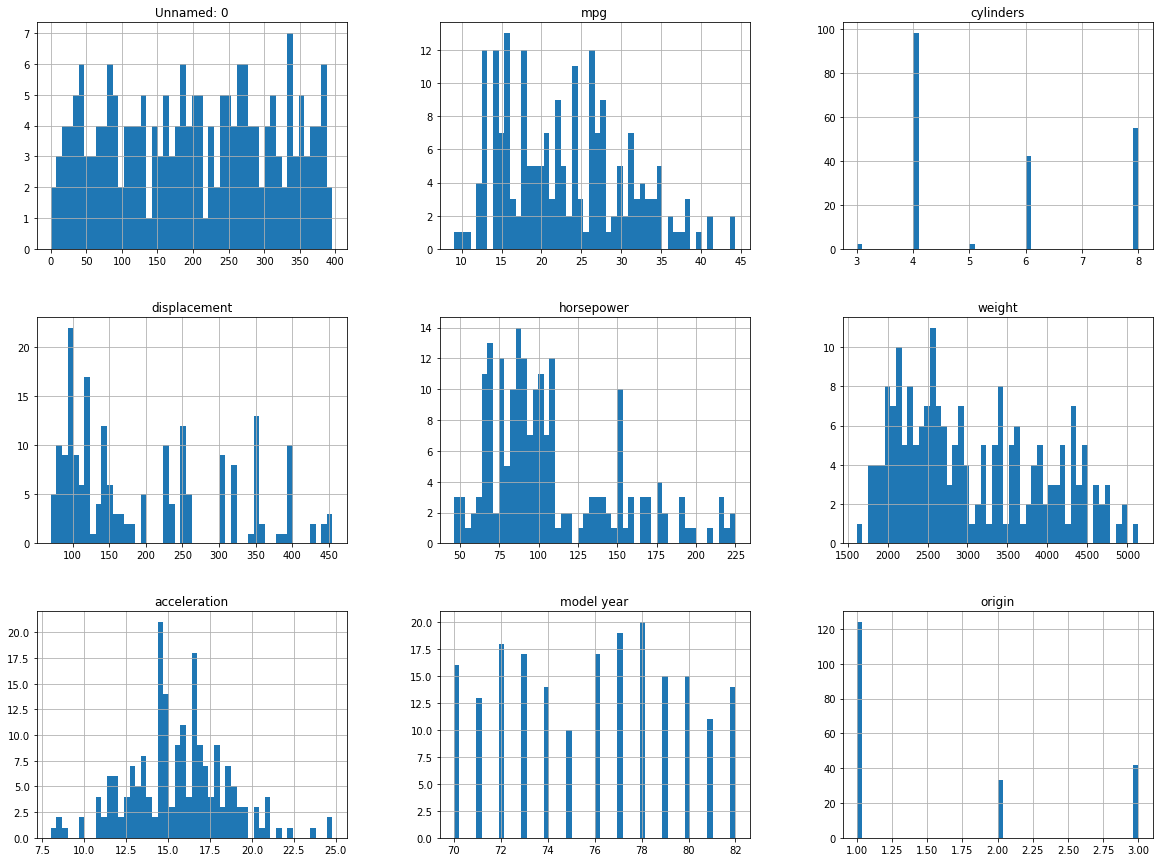

In [4]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

array([[<AxesSubplot:xlabel='Unnamed: 0', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='mpg', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='cylinders', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='displacement', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='weight', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='acceleration', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='model year', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='origin', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='horsepower', ylabel='Unnamed: 0'>],
       [<AxesSubplot:xlabel='Unnamed: 0', ylabel='mpg'>,
        <AxesSubplot:xlabel='mpg', ylabel='mpg'>,
        <AxesSubplot:xlabel='cylinders', ylabel='mpg'>,
        <AxesSubplot:xlabel='displacement', ylabel='mpg'>,
        <AxesSubplot:xlabel='weight', ylabel='mpg'>,
        <AxesSubplot:xlabel='acceleration', ylabel='mpg'>,
        <AxesSubplot:xlabel='model year', ylabel='mpg'>,
        <AxesSubplot:xlabel='origin', ylabel

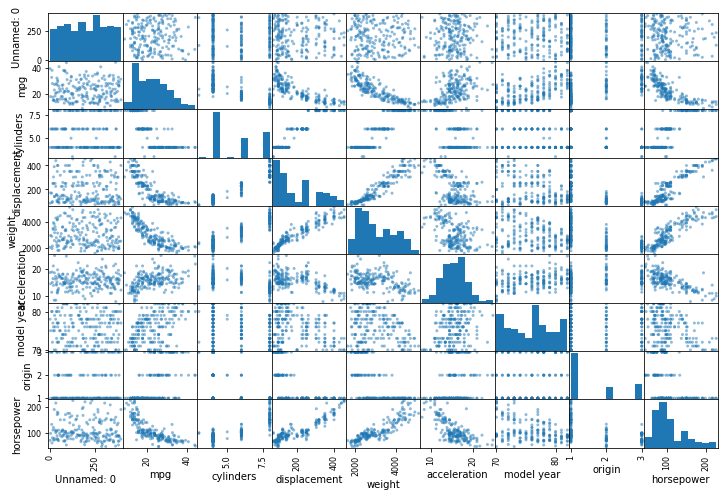

In [5]:
from pandas.plotting import scatter_matrix

attributes = ["Unnamed: 0", "mpg", "cylinders",
              "displacement", "weight", "acceleration",
              "model year", "origin", "horsepower"]
scatter_matrix(df[attributes], figsize=(12, 8), alpha=0.5)

In [6]:
df["horsepower"].value_counts()

88.0     11
110.0    11
100.0    10
90.0      9
97.0      8
         ..
125.0     1
138.0     1
153.0     1
82.0      1
137.0     1
Name: horsepower, Length: 72, dtype: int64

<AxesSubplot:>

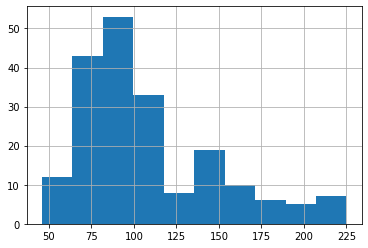

In [7]:
df["horsepower"].hist()

In [8]:
dfex = df.dropna(how='any')
dfex.info

<bound method DataFrame.info of      Unnamed: 0   mpg  cylinders  displacement  horsepower  weight  \
0             0  39.4          4            85        70.0    2070   
1             3  18.0          6           171        97.0    2984   
2             9  32.7          6           168       132.0    2910   
3            11  38.1          4            89        60.0    1968   
4            13  28.0          4            98        80.0    2164   
..          ...   ...        ...           ...         ...     ...   
194         384  27.0          4            97        88.0    2130   
195         385  26.0          4            79        67.0    1963   
196         387  29.0          4           135        84.0    2525   
197         395  31.3          4           120        75.0    2542   
198         396  15.5          8           400       190.0    4325   

     acceleration  model year  origin               car name  
0            18.6          78       3         datsun b210 gx  
1

array([[<AxesSubplot:xlabel='Unnamed: 0', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='mpg', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='displacement', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='weight', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='acceleration', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='model year', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='horsepower', ylabel='Unnamed: 0'>],
       [<AxesSubplot:xlabel='Unnamed: 0', ylabel='mpg'>,
        <AxesSubplot:xlabel='mpg', ylabel='mpg'>,
        <AxesSubplot:xlabel='displacement', ylabel='mpg'>,
        <AxesSubplot:xlabel='weight', ylabel='mpg'>,
        <AxesSubplot:xlabel='acceleration', ylabel='mpg'>,
        <AxesSubplot:xlabel='model year', ylabel='mpg'>,
        <AxesSubplot:xlabel='horsepower', ylabel='mpg'>],
       [<AxesSubplot:xlabel='Unnamed: 0', ylabel='displacement'>,
        <AxesSubplot:xlabel='mpg', ylabel='displacement'>,
        <AxesSubplot:xlabel='displacemen

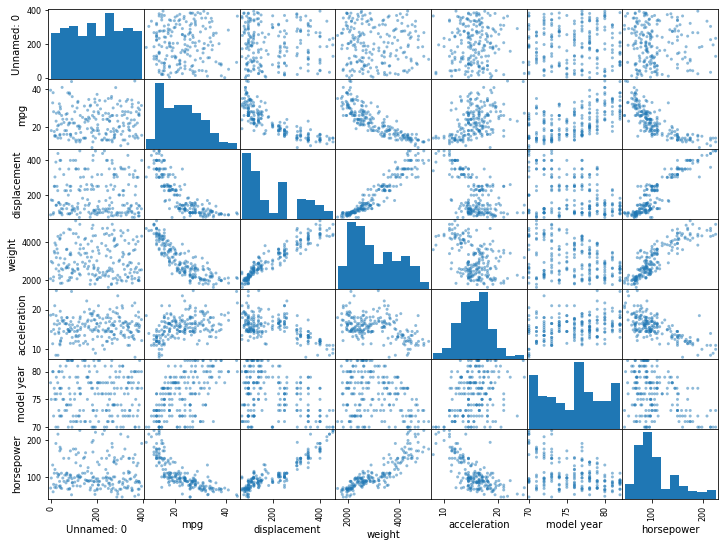

In [9]:
attributes = ["Unnamed: 0", "mpg", "displacement",
              "weight", "acceleration",
              "model year", "horsepower"]
scatter_matrix(df[attributes], figsize=(12, 9), alpha=0.5)

In [10]:
x=dfex["mpg"]
y=dfex["horsepower"].astype(int)

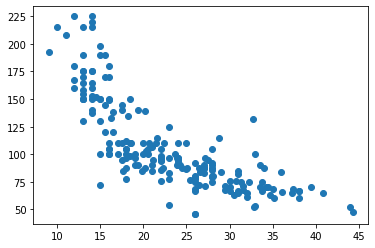

In [11]:
plt.scatter(x,y)

In [12]:
t=dfex["mpg"].values
x=(dfex.loc[:, ["displacement","horsepower", "weight"]]).values

In [13]:
from sklearn import preprocessing
x_pre= preprocessing.MinMaxScaler().fit_transform(x)

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x_pre, t, test_size=0.3, random_state=0)

In [15]:
len(x_test)

59

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [17]:
poly_features=PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x_train)

In [30]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_poly,t_train)
lin_reg.intercept_, lin_reg.coef_

(36.577515634562616,
 array([-29.70805065,  -2.09378558, -18.41292407, -14.32911727,
        102.19940384, -13.18392766, -47.90647492, -24.00181071,
         22.42288328]))

In [31]:
x_new=np.linspace(0, 1, 300).reshape(100, 3)
x_new_poly = poly_features.transform(x_new)
t_new = lin_reg.predict(x_new_poly)

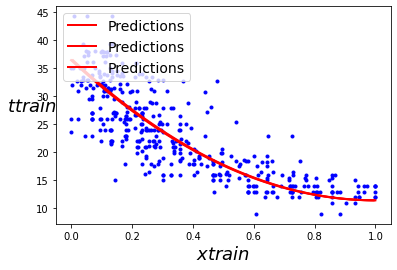

In [32]:
plt.plot(x_train, t_train, "b.")
plt.plot(x_new, t_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x train$", fontsize=18)
plt.ylabel("$t train$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

In [36]:
x_testpre = poly_features.transform(x_test)
t_pre = lin_reg.predict(x_testpre)

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# モデル評価
# rmse : 平均二乗誤差の平方根
mse = mean_squared_error(t_test , t_pre)  # MSE(平均二乗誤差)の算出
rmse = np.sqrt(mse) # RSME = √MSEの算出
print('RMSE :',rmse)

#MAE
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(t_test , t_pre) 
print("MAE",mae)

# r2 : 決定係数
r2 = r2_score(t_test,t_pre)
print('R2 :',r2)

RMSE : 3.3994603431739954
MAE 2.494355574382577
R2 : 0.7587460729866421
